# Group Proposal

## Introduction

It's estimated around 200 million people are living with coronary heart disease. Globally around 110 million men and 80 million women have coronary heart disease. Coronary heart disease kills an estimated nine million people each year – in 2019 it was the world's single biggest killer. In this project we will explore the predictive variables such age, sex, cholestorol levels, etc. We will explore in further detail in our proposal using the dataset from the UC Irvine Machine Learning Repository. This database contains 76 attributes, in this project however we will refer to using a subset of 14 of them.  In particular, we will only be looking at the Cleveland database as it is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Data Source: https://archive.ics.uci.edu/dataset/45/heart+disease

Source: https://www.bhf.org.uk/-/media/files/for-professionals/research/heart-statistics/bhf-cvd-statistics-global-factsheet.pdf

## Preliminary exploratory data analysis

### Read Data
First, we load the tidyverse library and heart disease data from csv file.

In [1]:
library(tidyverse)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url <- "https://raw.githubusercontent.com/wtarit/dsci-100-project/main/heart_disease_dataset/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


We can see that the data is already in tidy format. We check can check the distribution of data by counting number of row using num column.

In [3]:
class_distribution <- heart_disease |>
    group_by(num) |> 
    summarize(count = n())
class_distribution

num,count
<dbl>,<int>
0,164
1,55
2,36
3,35
4,13


To simplify the preliminary data analysis and visualization, we will only consider class as people who have heart disease and don't have heart disease.

In [4]:
heart_disease_binary <- heart_disease |> 
    mutate(num = num > 0, sex = as_factor(sex)) |>
    drop_na()
    

We can check the distribution again and see that the class is quite balanced but there's a bit more people without heart disease.

In [5]:
class_distribution <- heart_disease_binary |>
    group_by(num) |> 
    summarize(count = n()) 
class_distribution

num,count
<lgl>,<int>
FALSE,164
TRUE,139


Our first hypothesis is older people with higher cholestoral are more likely to have heart disease.

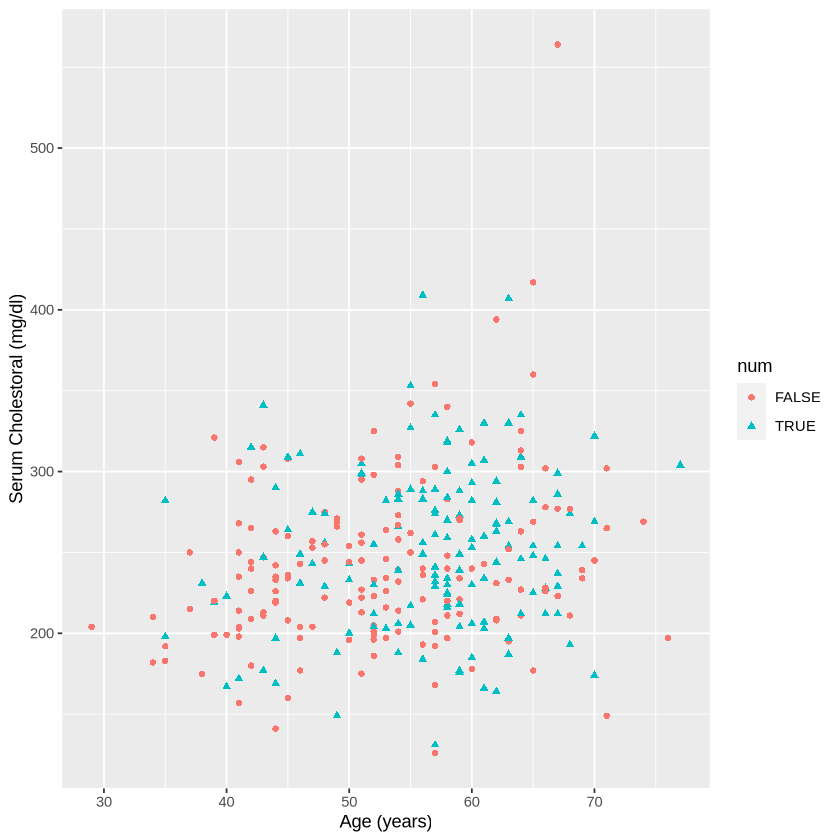

In [6]:
plot <- ggplot(heart_disease_binary, aes(x = age, y = chol, color = num, shape = num)) +
    geom_point() + 
    xlab("Age (years)") +
    ylab("Serum Cholestoral (mg/dl)")

plot

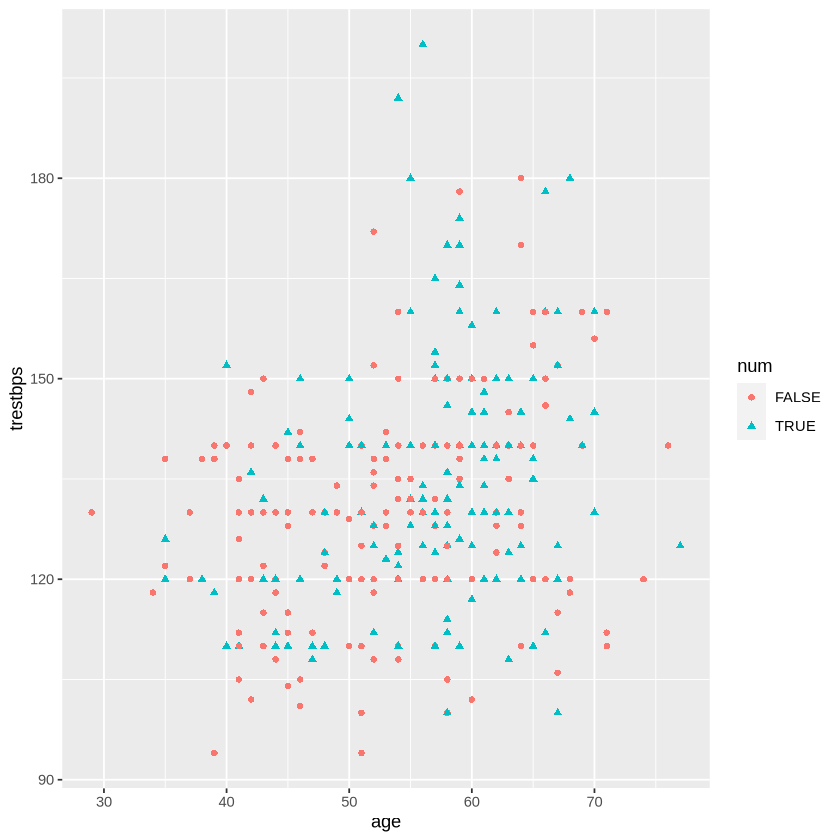

In [7]:
plot <- ggplot(heart_disease_binary, aes(x = age, y = trestbps, color = num, shape = num)) +
    geom_point()

plot

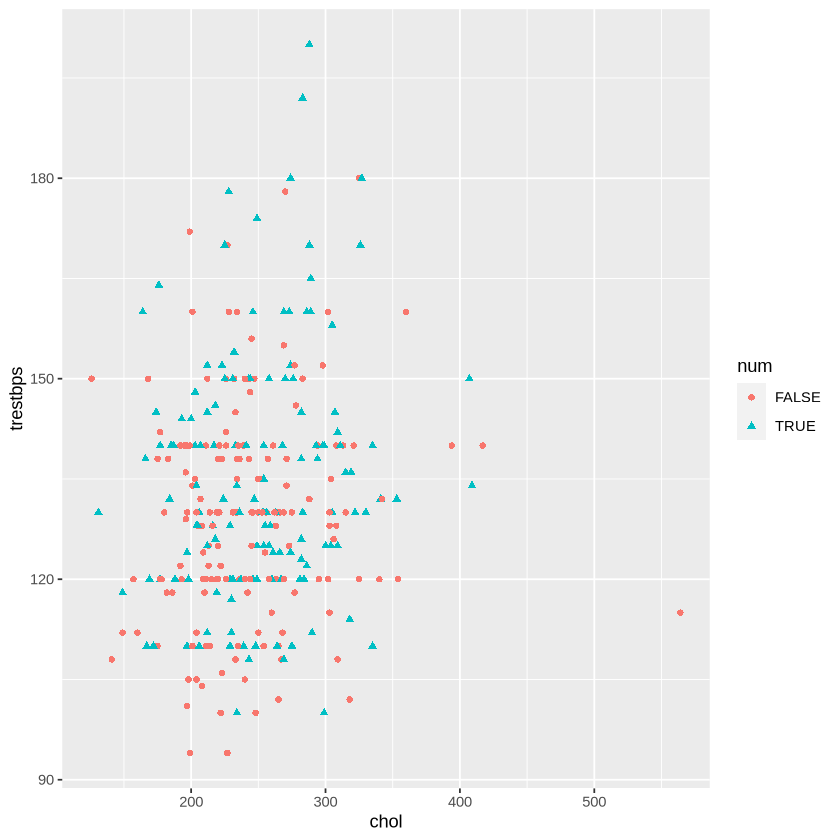

In [8]:
plot <- ggplot(heart_disease_binary, aes(x = chol, y = trestbps, color = num, shape = num)) +
    geom_point()

plot

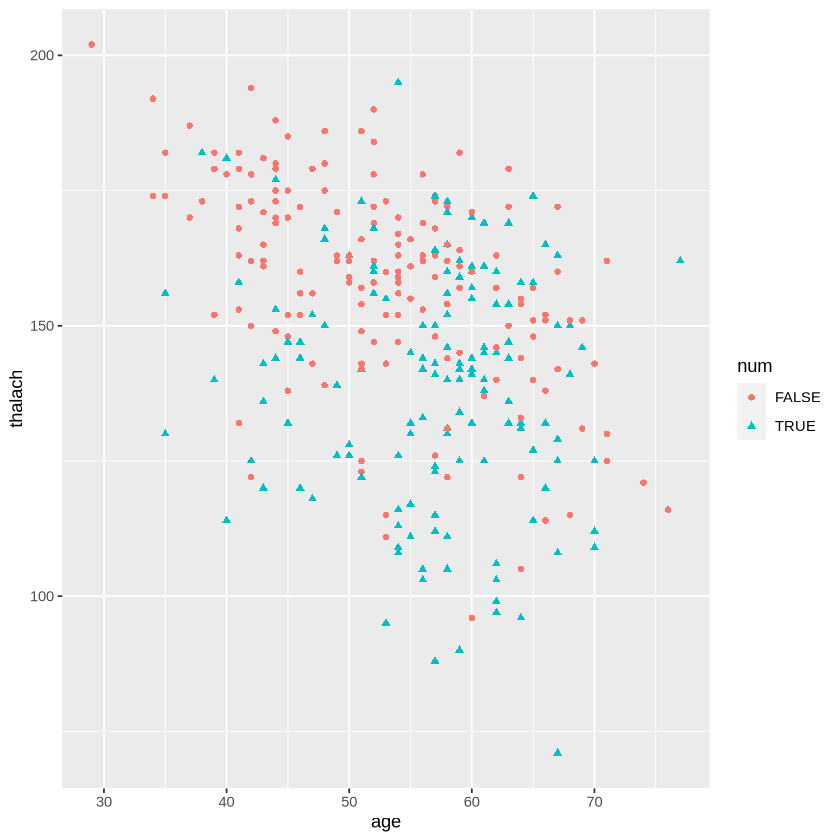

In [9]:
plot <- ggplot(heart_disease_binary, aes(x = age, y = thalach, color = num, shape = num)) +
    geom_point()

plot

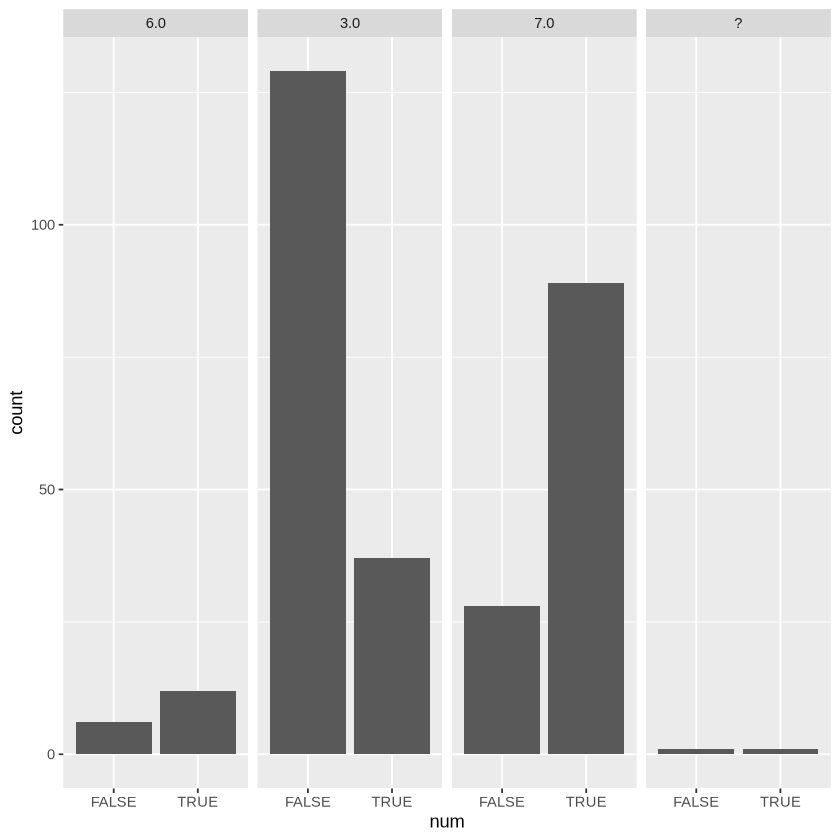

In [10]:
plot <- ggplot(heart_disease_binary, aes(x = num)) +
    geom_bar(stat = "count") +
    facet_grid(cols = vars(as_factor(thal)))

plot

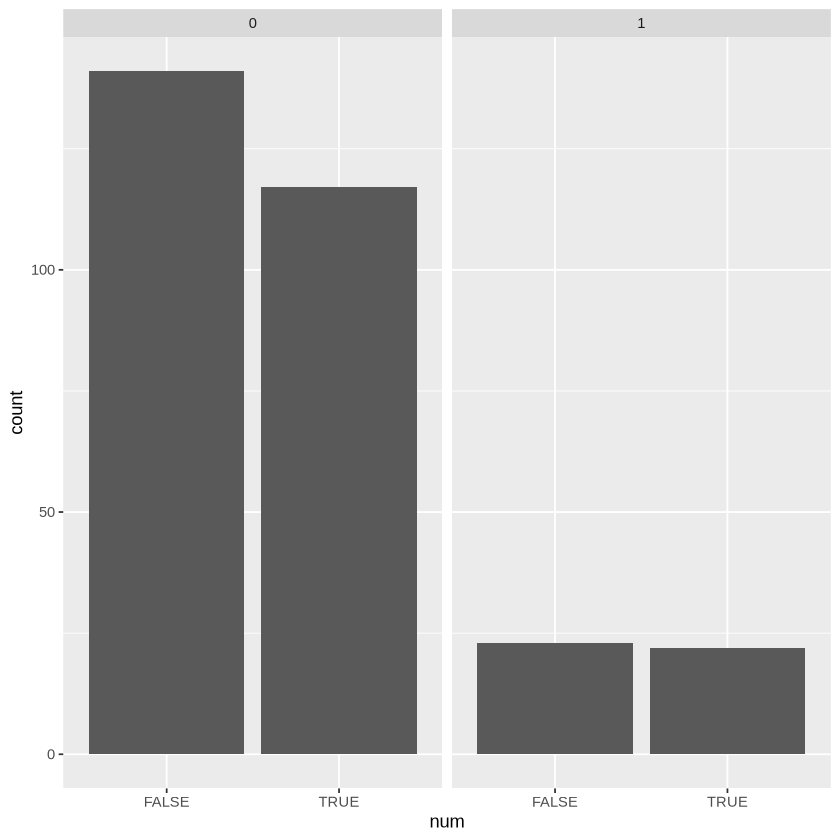

In [11]:
plot <- ggplot(heart_disease_binary, aes(x = num)) +
    geom_bar(stat = "count") +
    facet_grid(cols = vars(as_factor(fbs)))

plot

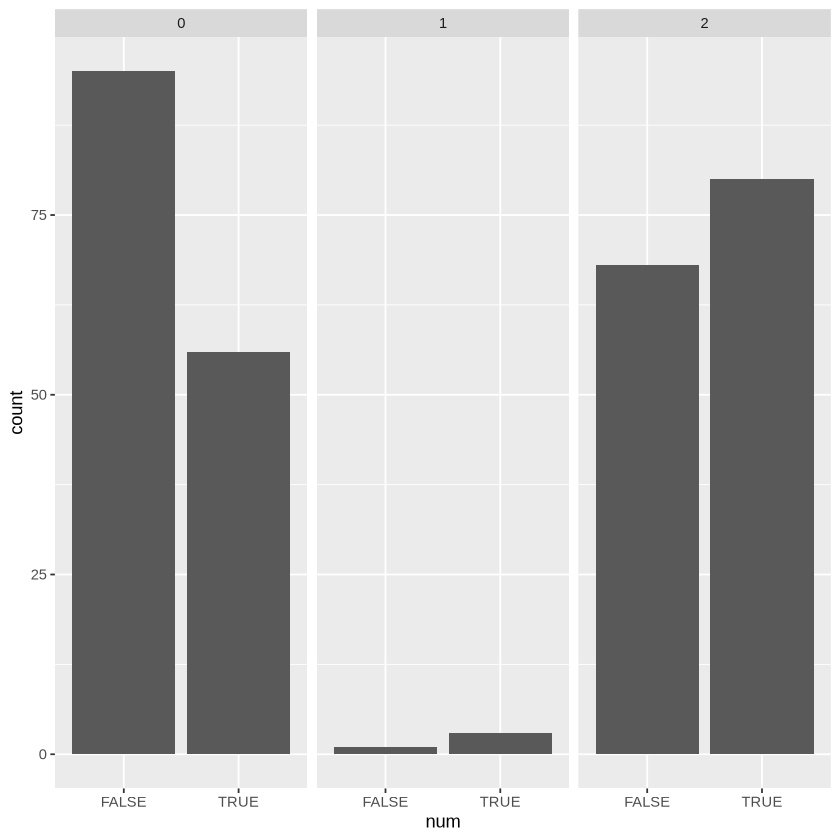

In [12]:
plot <- ggplot(heart_disease_binary, aes(x = num)) +
    geom_bar(stat = "count") +
    facet_grid(cols = vars(as_factor(restecg)))

plot

## Methods

This data analysis is conducted to help analyze the indication of the heart disease as soon as possible. Hence, here, we will focus on some main variables that we are going to use the most, which are age, serum cholestoral (in mg/dl), resting blood pressure, as well as angiographic disease status, which indicates the narrowing condition of the major blood vessels.

For the visualization, it will be developed to visualize the correlation between some variables, form the scatter plot, and then use the k-nearest neighbors algorithm to help classify new data, whether it is categorized as a heart disease or not, based on the trained data and model.

## Expected Outcomes and Significance

Our group is eager to do this data analysis to find any early detection of heart disease. According to the Centers for Disease Control and Prevention, heart disease is the leading cause of death for most people in the United States. Hence, we expect to find any correlation between some variables that might help us indicate early detection of heart disease.

The expected outcomes will have an impact on helping the medical team do an initial classification of heart disease without any complicated examination first. It would definitely save some time and money for the people and medical team.

The result of the data analysis could lead us to future questions which is how to minimize the variables that impact heart disease the most. So, a better prevention can be performed to prevent heart disease.

Source: https://www.cdc.gov/heartdisease/facts.htm